# <center> Predicting whether Marketing Campaigns will Success

# Table of Contents

1. **[Step 1 - Environment Preparation](#step1)**
2. **[Step 2 - Exploratory Data Analysis](#step2)**
3. **[Step 3 - Data Wrangling](#step3)**
4. **[Step 4 - Data Modeling with Machine Learning](#step4)**
5. **[Step 5 - Conclusion](#step5)**

<a id="step1"><a/>
# 1. Step 1 - Environment Preparation
Environment Preparation refers to loading essential packages, loading and skimming the dataset.

## 1.1 Import Necessary Packages

In [1]:
# Load Essential Libraries
import sys
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("Pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("Matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import sklearn #collection of machine learning algorithms
print("Scikit-learn version: {}". format(sklearn.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "./Bank_Data_20C/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in Bank_Data_20C directory

# from subprocess import check_output
# print(check_output(["ls", "./Bank_Data_20C"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:51:29) [MSC v.1929 64 bit (AMD64)]
Pandas version: 1.2.4
Matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.9.3
Scikit-learn version: 1.1.3
IPython version: 8.4.0
-------------------------


## 1.2 Load DataSet from CSV

In [2]:
BANK_DATA_20C_DIR = "./Bank_Data_20C"
BANK_DATA_16C_DIR = "./Bank_Data_16C"
FILE_FULL = "bank-full.csv"
FILE_TEN_PERCENT = "bank.csv"

def print_verbose(info):
    print('-'*100)
    print(info)
    print()

data_20c = pd.read_csv(f"{BANK_DATA_20C_DIR}/{FILE_FULL}", sep=';')
data_16c = pd.read_csv(f"{BANK_DATA_16C_DIR}/{FILE_FULL}", sep=';')

# Use Full Bank Data with 20 features by default
data = data_20c

## 1.3 Quick Look the Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.duplicated().sum()

12

In [8]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17088,34,blue-collar,single,unknown,no,no,yes,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
38536,73,retired,married,basic.4y,no,yes,no,telephone,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.724,5017.5,no
35743,33,entrepreneur,single,university.degree,no,no,no,cellular,may,mon,...,4,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,yes
2215,51,technician,married,professional.course,no,yes,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37675,74,retired,divorced,basic.4y,no,yes,no,cellular,aug,wed,...,1,13,1,success,-2.9,92.201,-31.4,0.854,5076.2,yes
26576,40,blue-collar,married,basic.4y,no,yes,no,cellular,nov,thu,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
17472,56,blue-collar,married,basic.4y,unknown,no,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14388,31,technician,single,university.degree,no,yes,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20343,53,admin.,divorced,university.degree,no,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,yes
19038,48,management,married,high.school,unknown,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no


<a id="step2"></a>
# 2. Step 2 - Exploratory Data Analysis

## 2.1 Uni-Variable Distribution

### 2.1.1 Categorical Features

In [9]:
def cat_visualize_bar(data, column):
    plt.figure(figsize=(8,4))
    ax=sns.countplot(x=column, data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
def cat_visualize_pie(data, column):
    percentages = (data[column].value_counts()/data.shape[0]*100)
    percentages_data, percentages_labels = list(percentages), list(percentages.index)
    plt.pie(percentages_data, labels=percentages_labels, autopct='%.1f%%')
    plt.title(f"`{column}` Percentage")
def cat_visualize_count_by_target(data, column):
    Y = data[column]
    total = len(Y)*1.
    ax=sns.countplot(x=column, data=data, hue='y')
    for p in ax.patches:
      ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### job

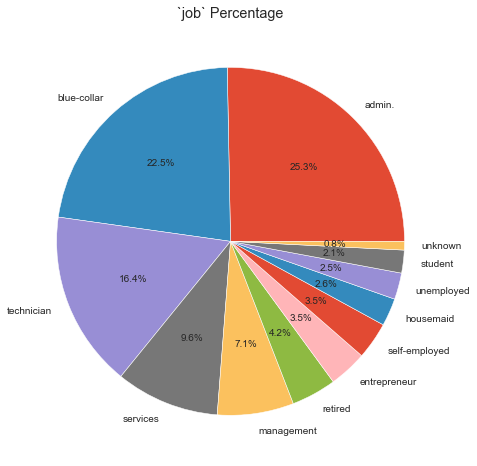

In [10]:
cat_visualize_pie(data, 'job')

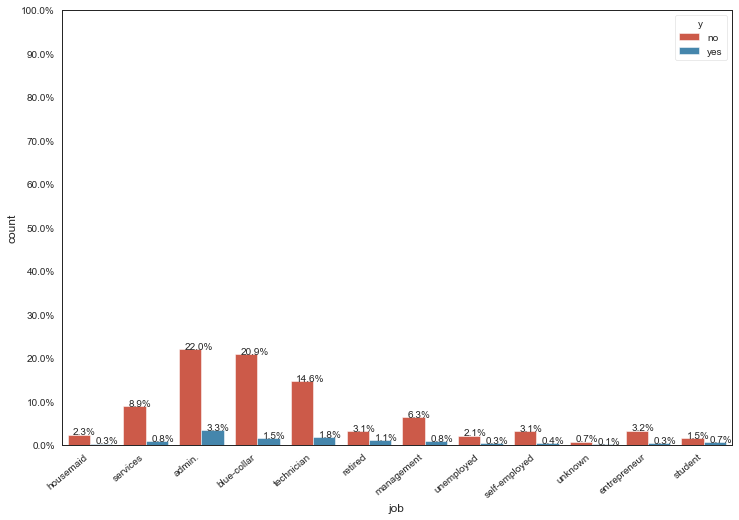

In [11]:
cat_visualize_count_by_target(data, 'job')

#### marital

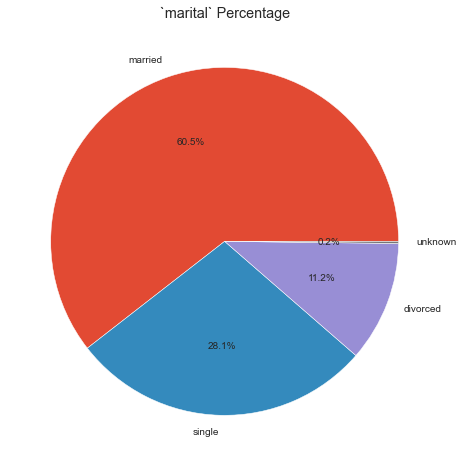

In [12]:
cat_visualize_pie(data, 'marital')

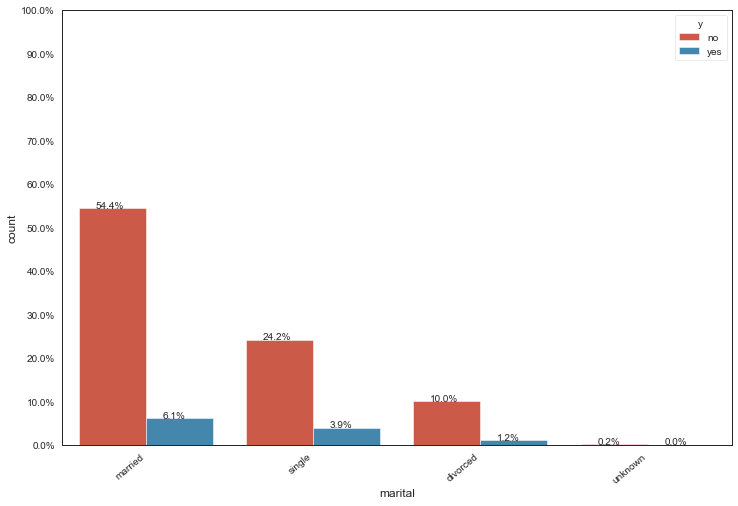

In [13]:
cat_visualize_count_by_target(data, 'marital')

#### education

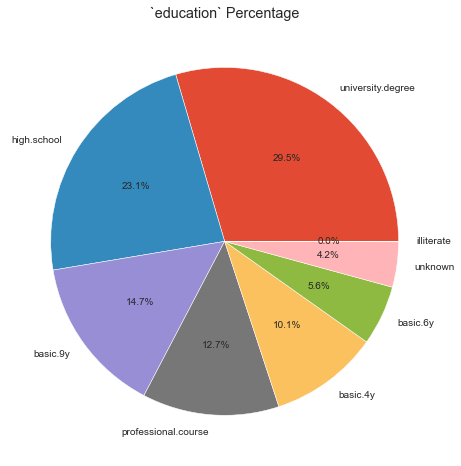

In [14]:
cat_visualize_pie(data, 'education')

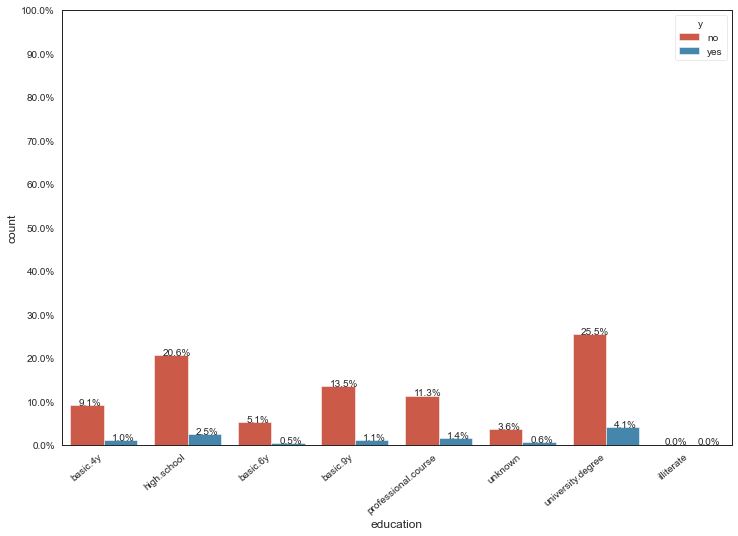

In [15]:
cat_visualize_count_by_target(data, 'education')

#### default

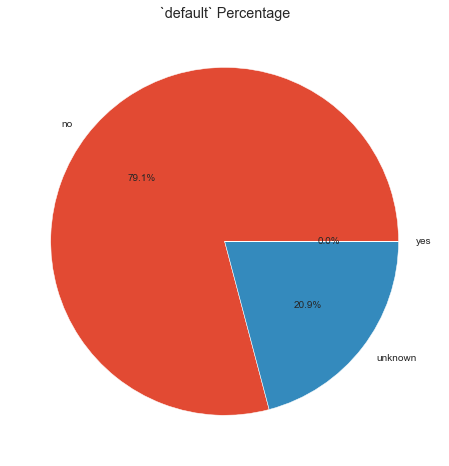

In [16]:
cat_visualize_pie(data, 'default')

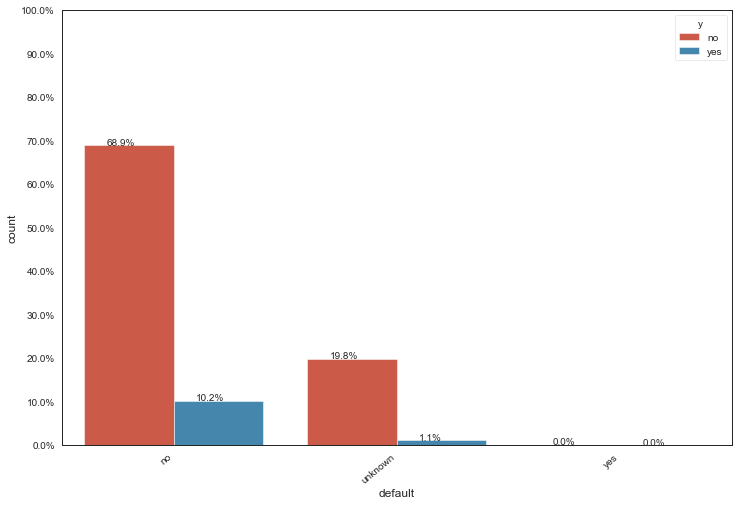

In [17]:
cat_visualize_count_by_target(data, 'default')

#### housing

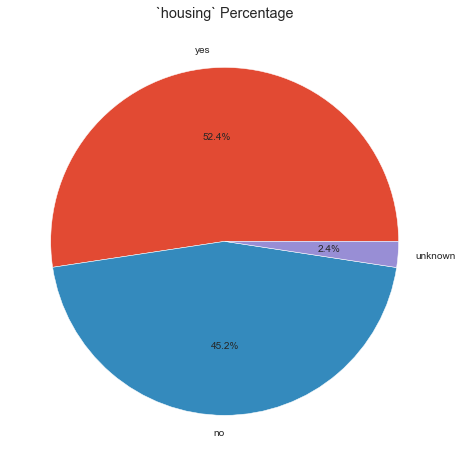

In [18]:
cat_visualize_pie(data, 'housing')

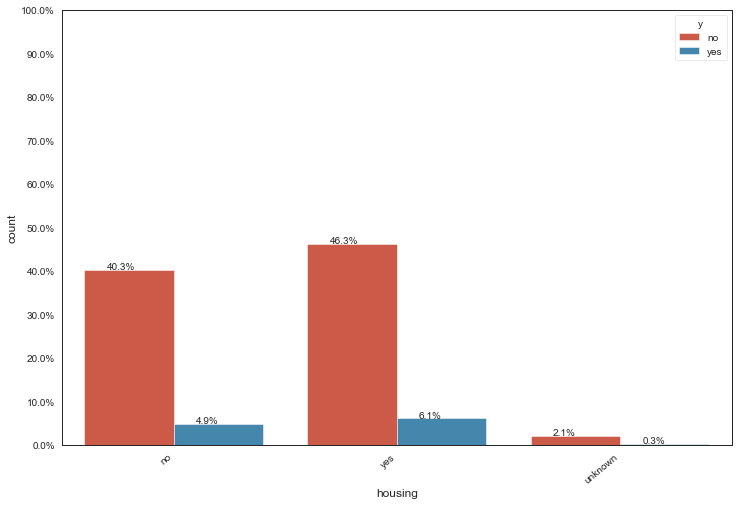

In [19]:
cat_visualize_count_by_target(data, 'housing')

#### loan

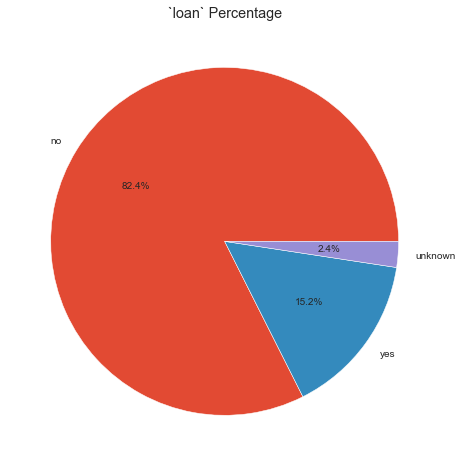

In [20]:
cat_visualize_pie(data, 'loan')

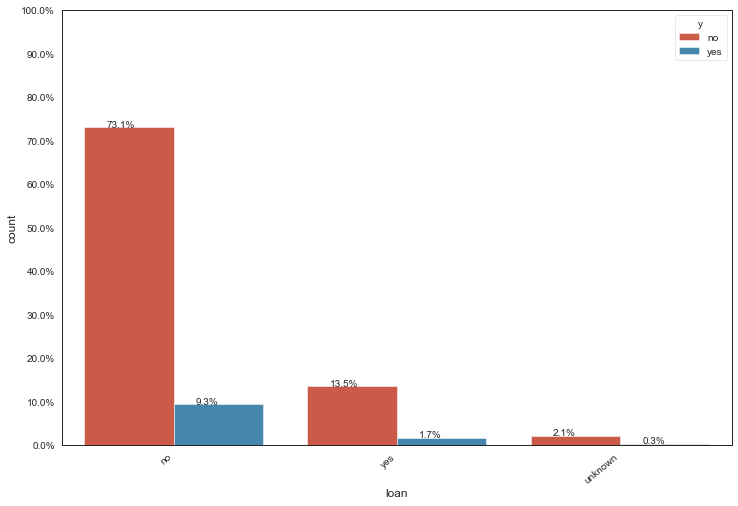

In [21]:
cat_visualize_count_by_target(data, 'loan')

#### contact

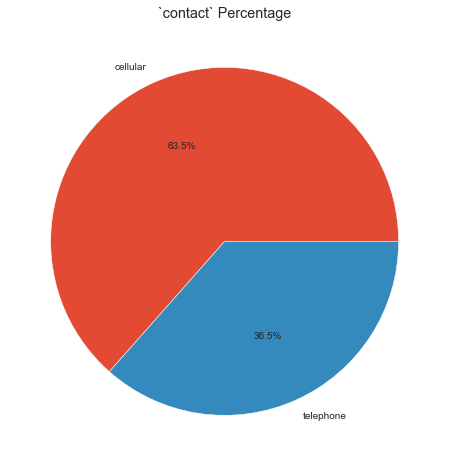

In [22]:
cat_visualize_pie(data, 'contact')

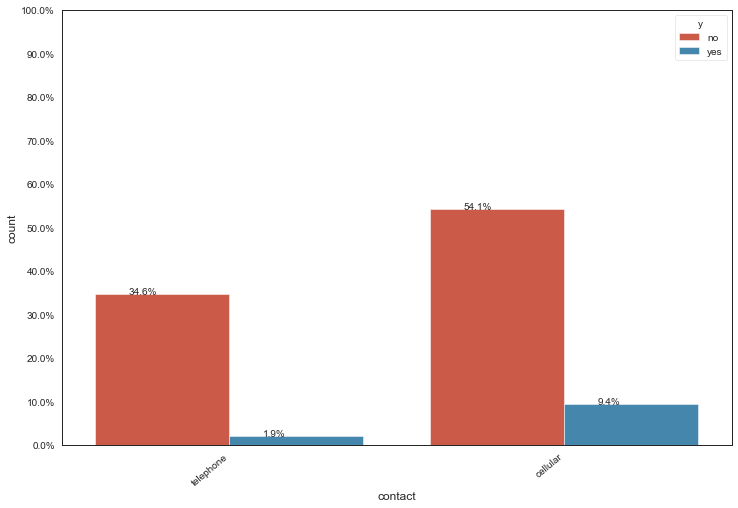

In [23]:
cat_visualize_count_by_target(data, 'contact')

#### month

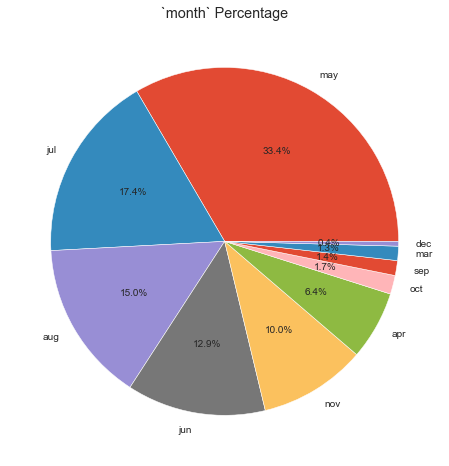

In [24]:
cat_visualize_pie(data, 'month')

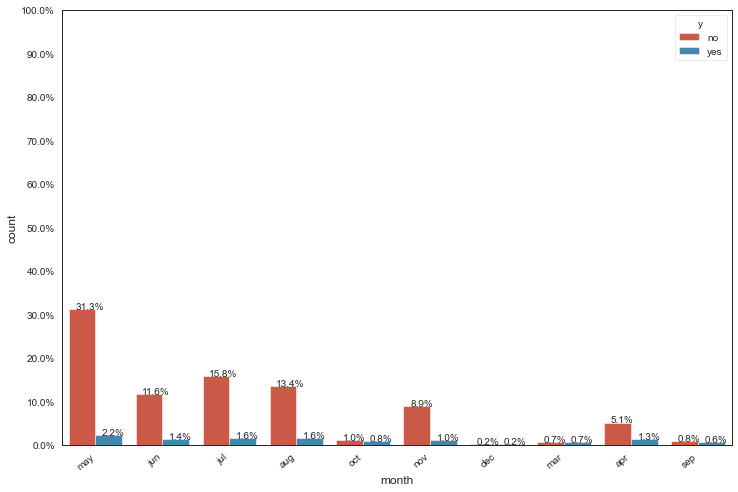

In [25]:
cat_visualize_count_by_target(data, 'month')

#### day_of_week

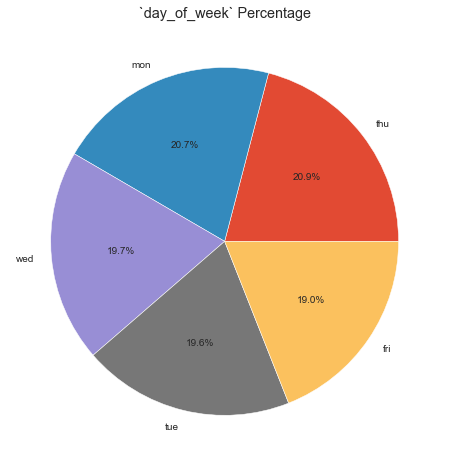

In [26]:
cat_visualize_pie(data, 'day_of_week')

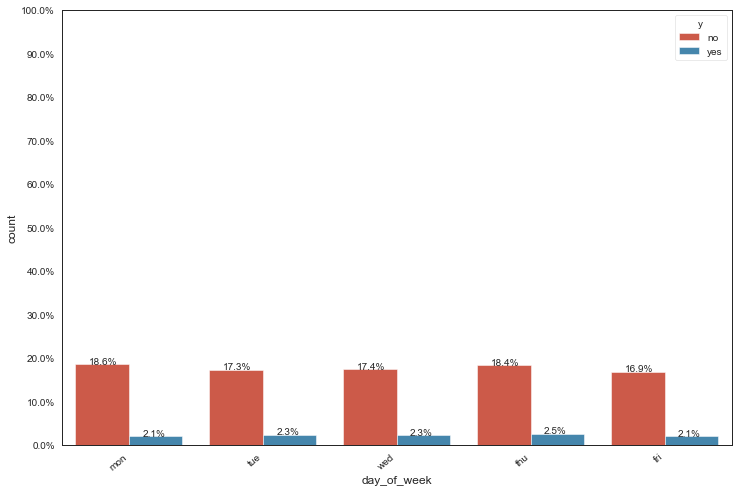

In [27]:
cat_visualize_count_by_target(data, 'day_of_week')

#### poutcome

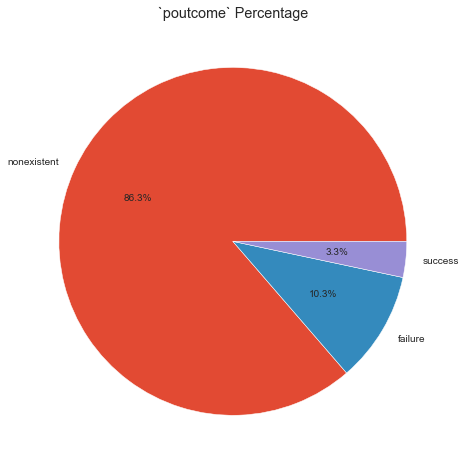

In [28]:
cat_visualize_pie(data, 'poutcome')

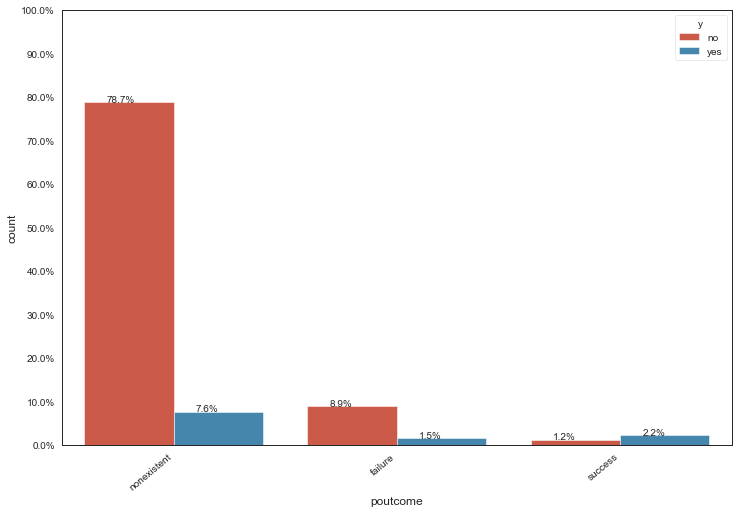

In [29]:
cat_visualize_count_by_target(data, 'poutcome')

#### target

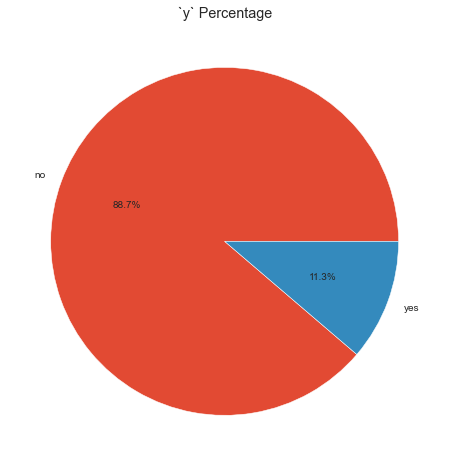

In [30]:
cat_visualize_pie(data, 'y')

### 2.1.2 Numerical Features

#### age

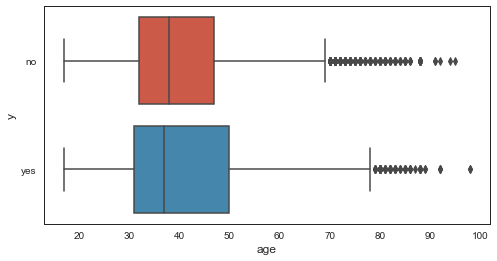

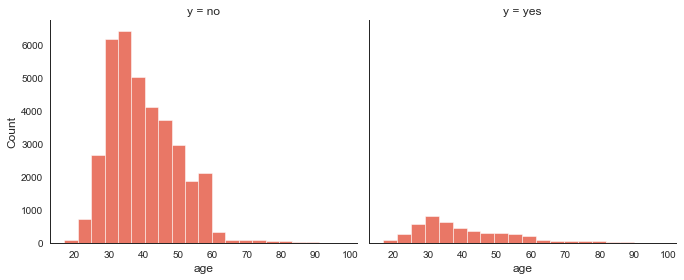

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x='age', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.histplot, 'age', bins=20)

#### duration

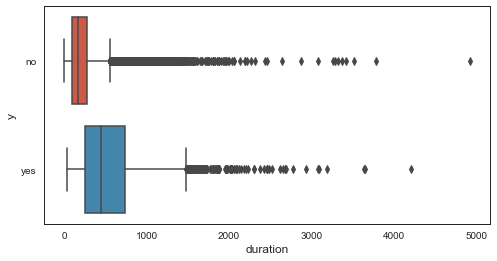

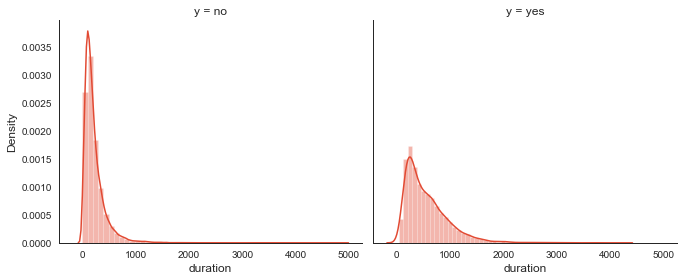

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(x='duration', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'duration')

#### campaign

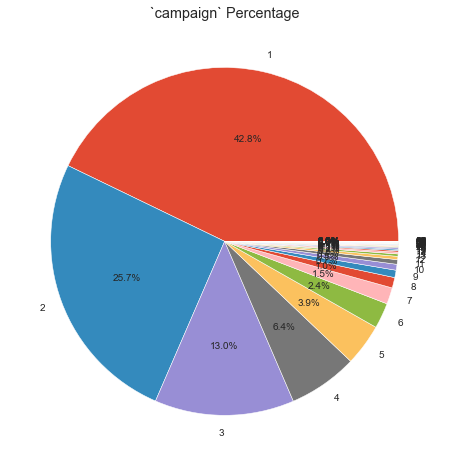

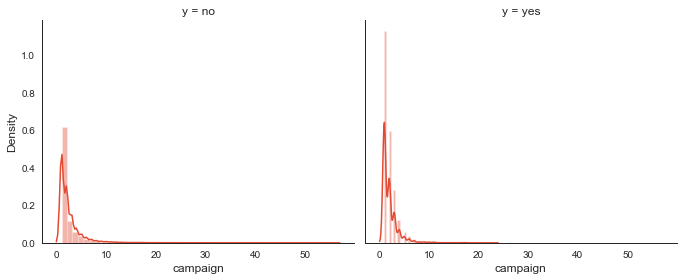

In [33]:
# plt.figure(figsize=(8,4))
# sns.boxplot(x='campaign', y='y', data=data)
cat_visualize_pie(data, 'campaign')
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'campaign')

#### pdays

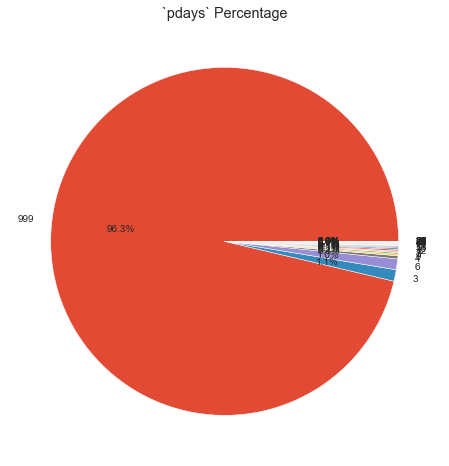

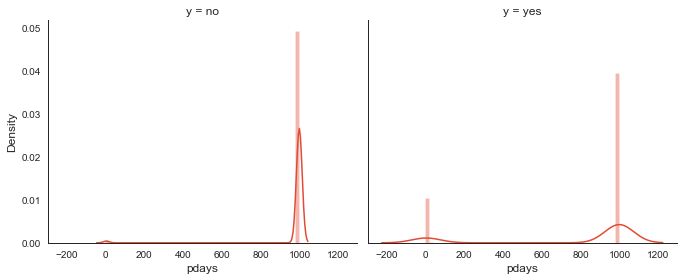

In [34]:
cat_visualize_pie(data, 'pdays')
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'pdays')

#### previous

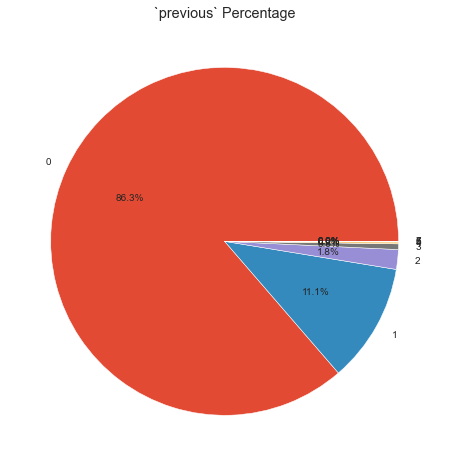

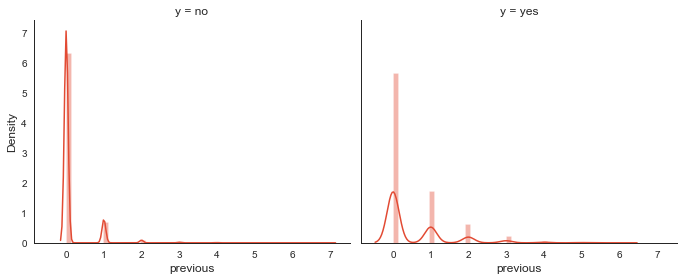

In [35]:
cat_visualize_pie(data, 'previous')
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'previous')

#### emp.var.rate

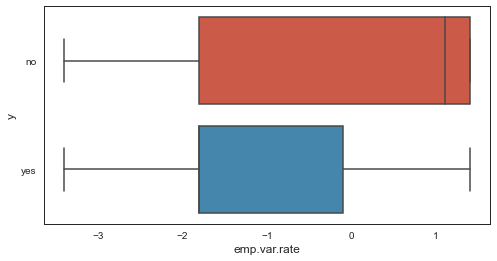

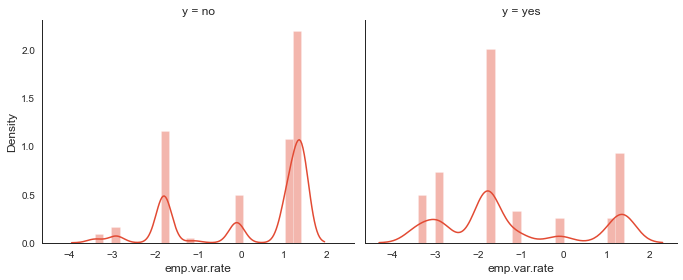

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(x='emp.var.rate', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'emp.var.rate')

#### cons.price.idx

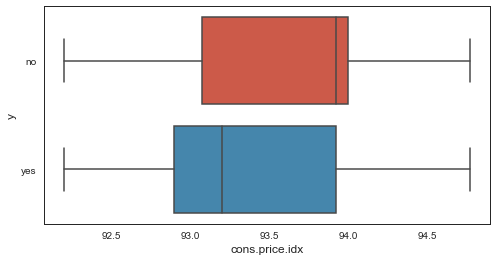

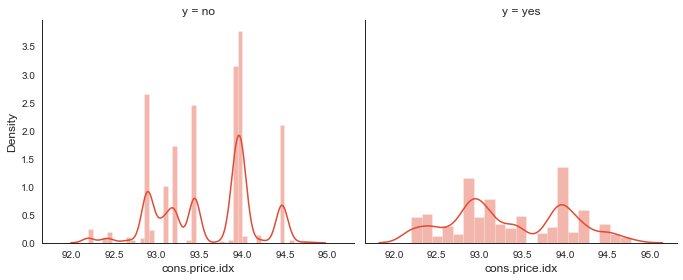

In [37]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cons.price.idx', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'cons.price.idx')

#### cons.conf.idx

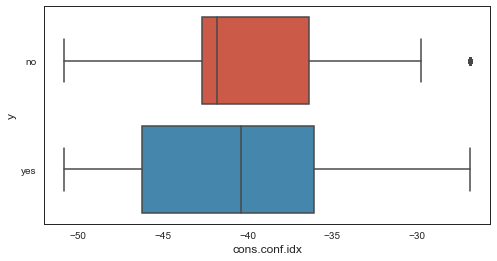

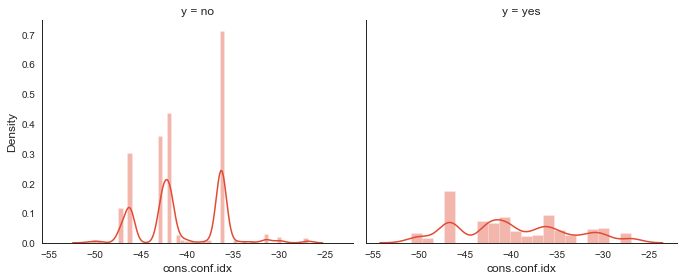

In [38]:
plt.figure(figsize=(8,4))
sns.boxplot(x='cons.conf.idx', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'cons.conf.idx')

#### euribor3m

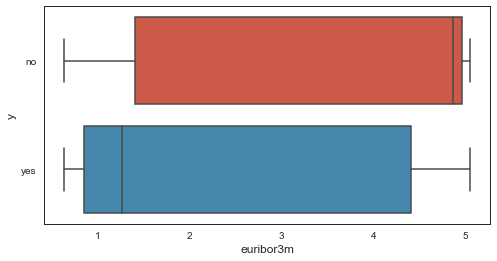

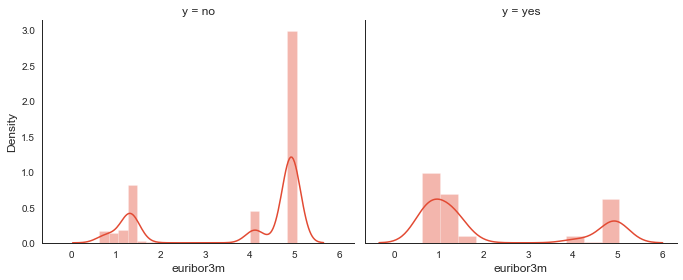

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(x='euribor3m', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'euribor3m')

#### nr.employed

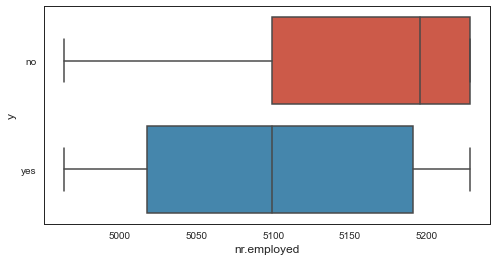

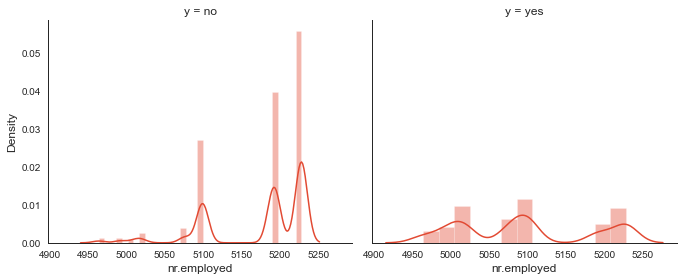

In [40]:
plt.figure(figsize=(8,4))
sns.boxplot(x='nr.employed', y='y', data=data)
fg=sns.FacetGrid(data=data, col='y', height=4, aspect=1.2)
fg.map(sns.distplot, 'nr.employed')

## 2.2 Multi-Vairable Correlation

## 2.3 Correlation Heatmap of Dataset

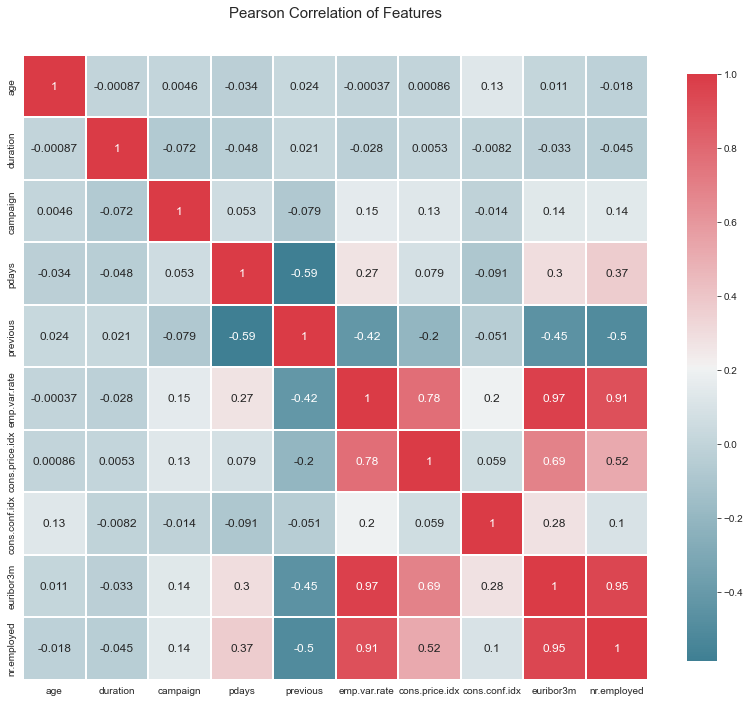

In [41]:
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

<a id="step3"></a>
# 3. Step 3 - Data Wrangling
Data Wrangling refers to the 4C process: Data Correcting, Completing, Creating and Converting.
1) Correcting aberrant values and outliers.
2) Completing missing information.
3) Creating new features for analysis.
4) Converting fields to the correct format for calculations and presentation.

In [42]:
# All Four Stages CONSTANT Parameters or Options
# Stage 1: Data Correcting: Directly drop dirty data
DROP_USELESS, USELESS_COLUMNS = True, ['month', 'day_of_week'] # possibly useless columns ['marital', 'month', 'day_of_week']
DROP_NOISY, NOISY_COLUMNS = True, ['default', 'pdays'] # possibly noisy columns ['default', 'pdays']: default with higher than 20% missing values, while pdays with too many outliers
DROP_UNPRACTICAL, UNPRACTICAL_COLUMNS = False, ['duration'] # remain if benchmark purpose, drop if practical use
# Stage 2: Data Completing: directly drop low-frequency rows with 'unknown' values in some columns rather than add some noise

# Stage 3: Data Creating
CREATE_COLUMNS = ['age']
# Stage 4: Data Converting: categorical featuers encoding and numercial features scaling
ENCODE_OPTION = 'label' # onehot or label encoding for categorical features
IF_SCALE = True # whether to scale or not
SCALE_OPTION = 'minmax' # minmax, robust or standard scaling for all numerical featuers

## 3.1 Data Correcting
In this stage, I will 
1. drop ('marital', 'day_of_week', 'month') because these are useless features for prediting the target
2. drop ('default') because there are too many 'unknown' values (higher than 20%) in this column
3. drop ('duration') because in real-time practice there is no duration feature

In [43]:
data_corrected = data
drop_columns = []
if DROP_USELESS:
    drop_columns.extend(USELESS_COLUMNS)
if DROP_NOISY:
    drop_columns.extend(NOISY_COLUMNS)
if DROP_UNPRACTICAL:
    drop_unpractical.extend(UNPRACTICAL_COLUMNS)
data_corrected = data_corrected.drop(drop_columns, axis=1)
data_corrected = data_corrected.drop_duplicates()

In [44]:
data_corrected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41172 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41172 non-null  int64  
 1   job             41172 non-null  object 
 2   marital         41172 non-null  object 
 3   education       41172 non-null  object 
 4   housing         41172 non-null  object 
 5   loan            41172 non-null  object 
 6   contact         41172 non-null  object 
 7   duration        41172 non-null  int64  
 8   campaign        41172 non-null  int64  
 9   previous        41172 non-null  int64  
 10  poutcome        41172 non-null  object 
 11  emp.var.rate    41172 non-null  float64
 12  cons.price.idx  41172 non-null  float64
 13  cons.conf.idx   41172 non-null  float64
 14  euribor3m       41172 non-null  float64
 15  nr.employed     41172 non-null  float64
 16  y               41172 non-null  object 
dtypes: float64(5), int64(4), object

In [45]:
data_corrected.describe(include=['number'])

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41172.000000,41172.000000,41172.000000,41172.000000,41172.000000,41172.000000,41172.000000,41172.000000,41172.000000
mean,40.023365,258.331317,2.568032,0.173030,0.081808,93.575706,-40.503276,3.621168,5167.030739
std,10.420784,259.312967,2.770410,0.494985,1.570916,0.578859,4.627895,1.734475,72.253427
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [46]:
data_corrected.describe(include=['object', 'category'])

,job,marital,education,housing,loan,contact,poutcome,y
count,41172,41172,41172,41172,41172,41172,41172,41172
unique,12,4,8,3,3,2,3,2
top,admin.,married,university.degree,yes,no,cellular,nonexistent,no
freq,10418,24917,12163,21569,33934,26133,35547,36533


In [47]:
data_corrected.sample(10)

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29467,35,blue-collar,married,high.school,no,no,cellular,29,3,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
40886,70,retired,married,basic.4y,no,no,cellular,122,1,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
5469,38,technician,married,professional.course,yes,yes,telephone,456,4,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
34589,35,blue-collar,married,high.school,yes,no,cellular,121,1,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
37265,43,admin.,single,high.school,yes,no,cellular,231,3,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,yes
12778,34,admin.,married,professional.course,no,yes,cellular,82,1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
37359,59,admin.,divorced,professional.course,yes,no,telephone,91,1,1,failure,-2.9,92.201,-31.4,0.883,5076.2,no
35456,57,admin.,single,high.school,yes,no,telephone,26,5,1,success,-1.8,92.893,-46.2,1.244,5099.1,no
7501,37,admin.,married,high.school,no,no,telephone,868,1,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
27264,37,admin.,married,unknown,yes,yes,cellular,196,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no


In [48]:
data_corrected.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [49]:
data_corrected.duplicated().sum()

0

## 3.2 Data Completing
There are no explicit missing values for numerical features, but there are implicit missing values for categorical features after dropping ('poutcome', 'default'):
- job: 'unknown' 0.8%
- marital: 'unknown': 0.2%
- education: 'unknown' 4.2%
- housing: 'unknown' 2.4%
- loan: 'unknown' 2.4%

As we cannot simply fill these 'unknown' values with most frequent values, we can simply drop these rows because these valus account not so much.

In [50]:
data_completed = data_corrected.copy()
cat_columns = list(data_completed.select_dtypes(include=['object']).columns)
for column in cat_columns:
    data_completed = data_completed.drop(data_completed[data_completed[column]=='unknown'].index)

In [51]:
data_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38230 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38230 non-null  int64  
 1   job             38230 non-null  object 
 2   marital         38230 non-null  object 
 3   education       38230 non-null  object 
 4   housing         38230 non-null  object 
 5   loan            38230 non-null  object 
 6   contact         38230 non-null  object 
 7   duration        38230 non-null  int64  
 8   campaign        38230 non-null  int64  
 9   previous        38230 non-null  int64  
 10  poutcome        38230 non-null  object 
 11  emp.var.rate    38230 non-null  float64
 12  cons.price.idx  38230 non-null  float64
 13  cons.conf.idx   38230 non-null  float64
 14  euribor3m       38230 non-null  float64
 15  nr.employed     38230 non-null  float64
 16  y               38230 non-null  object 
dtypes: float64(5), int64(4), object

In [52]:
data_completed.describe(include=['number'])

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38230.000000,38230.000000,38230.000000,38230.000000,38230.000000,38230.000000,38230.000000,38230.000000,38230.000000
mean,39.859953,258.252969,2.567094,0.170076,0.082812,93.570365,-40.541964,3.623202,5167.428750
std,10.288796,259.827170,2.767875,0.487253,1.565890,0.576382,4.622818,1.730244,71.761949
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [53]:
data_completed.describe(include=['object', 'category'])

,job,marital,education,housing,loan,contact,poutcome,y
count,38230,38230,38230,38230,38230,38230,38230,38230
unique,11,3,7,2,2,2,3,2
top,admin.,married,university.degree,yes,no,cellular,nonexistent,no
freq,9933,23173,11816,20571,32271,24430,33051,33973


In [54]:
data_completed.sample(10)

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33635,41,services,married,high.school,yes,yes,cellular,21,8,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
29486,30,student,single,high.school,yes,no,cellular,7,6,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
36947,51,housemaid,married,basic.4y,yes,yes,cellular,97,1,1,failure,-2.9,92.469,-33.6,1.072,5076.2,no
11244,38,admin.,married,high.school,yes,yes,telephone,2028,1,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
9847,36,blue-collar,married,basic.6y,no,no,telephone,105,4,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
15119,23,management,single,university.degree,no,yes,cellular,49,1,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
32053,36,blue-collar,married,basic.9y,no,no,cellular,189,3,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
25018,30,admin.,married,high.school,yes,no,cellular,92,1,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
27526,48,technician,married,professional.course,yes,yes,cellular,695,3,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
26325,33,services,married,high.school,yes,yes,cellular,422,1,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


In [55]:
data_completed.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [56]:
data_completed.duplicated().sum()

0

## 3.3 Data Creating
'age' feature need to be quantized into discrete bins to create new 'age_period' feature:

In [57]:
data_created = data_completed.copy()
for column in CREATE_COLUMNS:
    if column == 'age':
        data_created.insert(0, 'age_period', pd.cut(data_completed['age'].astype(int), 5))
        data_created = data_created.drop('age', axis=1)
data_created = data_created.drop_duplicates()

In [58]:
data_created.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38184 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age_period      38184 non-null  category
 1   job             38184 non-null  object  
 2   marital         38184 non-null  object  
 3   education       38184 non-null  object  
 4   housing         38184 non-null  object  
 5   loan            38184 non-null  object  
 6   contact         38184 non-null  object  
 7   duration        38184 non-null  int64   
 8   campaign        38184 non-null  int64   
 9   previous        38184 non-null  int64   
 10  poutcome        38184 non-null  object  
 11  emp.var.rate    38184 non-null  float64 
 12  cons.price.idx  38184 non-null  float64 
 13  cons.conf.idx   38184 non-null  float64 
 14  euribor3m       38184 non-null  float64 
 15  nr.employed     38184 non-null  float64 
 16  y               38184 non-null  object  
dtypes: category(

In [59]:
data_created.describe(include=['number'])

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000
mean,258.394537,2.568510,0.170281,0.081851,93.570153,-40.544657,3.622147,5167.394301
std,259.936448,2.769151,0.487511,1.566167,0.576535,4.623556,1.730559,71.778700
min,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,320.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [60]:
data_created.describe(include=['category', 'object'])

,age_period,job,marital,education,housing,loan,contact,poutcome,y
count,38184,38184,38184,38184,38184,38184,38184,38184,38184
unique,5,11,3,7,2,2,2,3,2
top,"(33.2, 49.4]",admin.,married,university.degree,yes,no,cellular,nonexistent,no
freq,18723,9914,23134,11799,20548,32227,24406,33005,33927


In [61]:
data_created.sample(10)

,age_period,job,marital,education,housing,loan,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14286,"(33.2, 49.4]",retired,single,basic.6y,yes,no,cellular,315,3,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
15601,"(16.919, 33.2]",admin.,single,university.degree,no,no,cellular,190,4,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
20783,"(33.2, 49.4]",management,married,university.degree,yes,no,telephone,306,1,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
1887,"(16.919, 33.2]",technician,single,high.school,no,yes,telephone,213,2,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
9390,"(49.4, 65.6]",technician,married,university.degree,no,no,telephone,431,2,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
8238,"(33.2, 49.4]",admin.,single,university.degree,no,yes,telephone,143,1,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
25174,"(33.2, 49.4]",blue-collar,single,basic.9y,yes,no,cellular,82,2,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9427,"(16.919, 33.2]",blue-collar,single,high.school,yes,no,telephone,446,3,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
23385,"(16.919, 33.2]",admin.,single,university.degree,yes,no,cellular,120,3,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
40816,"(16.919, 33.2]",technician,single,university.degree,yes,no,cellular,173,2,4,failure,-1.1,94.199,-37.5,0.879,4963.6,yes


In [62]:
data_created.isnull().sum()

age_period        0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [63]:
data_created.duplicated().sum()

0

## 3.4 Data Converting
There are several categorical object features(age_period, job, education, housing, loan and contact) need to be labeled:
- age_period: (0-16.919, 16.919-33.2, 33.2-49.4, 49.4-65.6, 65.6-98.0)
- job: ('admin', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'student')
- marital: ('married', 'single', 'divorced')
- education: ('university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.4y', 'basic.6y', 'illiterate')
- housing ('yes', 'no')
- loan ('yes', 'no')
- contact ('cellular', 'telephone')
- target ('yes', 'no')
- month ('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'dec', 'nov', 'dec')
- day_of_week ('mon', 'tue', 'wed', 'thu', 'fri')

In [64]:
data_converted = data_created.copy()
cat_columns = list(data_converted.select_dtypes(include=['object']).columns)
cat_columns.remove('y')
encoder = LabelEncoder()

# age_period => age_period_code
data_converted['age_period_code'] = encoder.fit_transform(data_converted['age_period'])
data_converted = data_converted.drop(['age_period'], axis=1)

# y => target: yes => 1, no => 0
data_converted['target'] = encoder.fit_transform(data_converted['y'])
data_converted = data_converted.drop(['y'], axis=1)

# encode remaining categorical columns
if ENCODE_OPTION == 'onehot':
    data_converted = pd.get_dummies(data_converted)
else:
    for column in cat_columns:
        data_converted[f"{column}_code"] = encoder.fit_transform(data_converted[column])
        data_converted = data_converted.drop([column], axis=1)
    
# Scale and Normalize
if IF_SCALE:
    if SCALE_OPTION == 'minmax':
        scaler = MinMaxScaler()
    elif SCALE_OPTION == 'standard':
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()
    num_columns = list(data_converted.select_dtypes(include=['number']).columns)
    for column in num_columns:
        data_converted[column] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data_converted[column])), index=data_converted.index, columns=[column])

In [65]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38184 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         38184 non-null  float64
 1   campaign         38184 non-null  float64
 2   previous         38184 non-null  float64
 3   emp.var.rate     38184 non-null  float64
 4   cons.price.idx   38184 non-null  float64
 5   cons.conf.idx    38184 non-null  float64
 6   euribor3m        38184 non-null  float64
 7   nr.employed      38184 non-null  float64
 8   age_period_code  38184 non-null  float64
 9   target           38184 non-null  float64
 10  job_code         38184 non-null  float64
 11  marital_code     38184 non-null  float64
 12  education_code   38184 non-null  float64
 13  housing_code     38184 non-null  float64
 14  loan_code        38184 non-null  float64
 15  contact_code     38184 non-null  float64
 16  poutcome_code    38184 non-null  float64
dtypes: float64(1

In [66]:
data_converted.describe(include=['number'])

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_period_code,target,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code
count,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000,38184.000000
mean,0.052541,0.037345,0.024326,0.725386,0.533575,0.429094,0.677431,0.770489,0.221474,0.111486,0.365417,0.584433,0.601967,0.538131,0.156008,0.360832,0.464737
std,0.052854,0.065932,0.069644,0.326285,0.224682,0.193454,0.392328,0.271375,0.185472,0.314738,0.355536,0.302340,0.344259,0.498550,0.362867,0.480248,0.180736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020740,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000,0.000000,0.000000,0.500000
50%,0.036600,0.023810,0.000000,0.937500,0.484412,0.376569,0.957379,0.859735,0.250000,0.000000,0.200000,0.500000,0.500000,1.000000,0.000000,0.000000,0.500000
75%,0.065067,0.047619,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,0.250000,0.000000,0.700000,1.000000,1.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
data_converted.sample(10)

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_period_code,target,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code
19216,0.044327,0.000000,0.000000,1.000000,0.484412,0.615063,0.982317,1.000000,0.00,0.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.5
7583,0.030094,0.000000,0.000000,0.937500,0.698753,0.602510,0.958966,0.859735,0.25,0.0,0.0,0.5,0.833333,0.0,1.0,1.0,0.5
38403,0.137454,0.023810,0.142857,0.000000,0.089634,1.000000,0.023351,0.203781,0.00,1.0,0.4,1.0,1.000000,1.0,0.0,0.0,0.0
7315,0.019317,0.047619,0.000000,0.937500,0.698753,0.602510,0.958059,0.859735,0.00,0.0,0.9,1.0,0.833333,0.0,0.0,1.0,0.5
12084,0.031110,0.023810,0.000000,1.000000,0.882307,0.376569,0.977783,1.000000,0.00,0.0,0.2,0.5,0.333333,0.0,0.0,1.0,0.5
36083,0.022773,0.000000,0.000000,0.333333,0.269680,0.192469,0.143278,0.512287,0.00,0.0,0.4,1.0,1.000000,1.0,0.0,0.0,0.5
2532,0.076861,0.000000,0.000000,0.937500,0.698753,0.602510,0.957153,0.859735,0.25,0.0,0.7,0.5,0.500000,1.0,0.0,1.0,0.5
31575,0.038430,0.000000,0.000000,0.333333,0.269680,0.192469,0.157107,0.512287,0.00,0.0,0.7,1.0,0.500000,1.0,0.0,0.0,0.5
27506,0.008337,0.023810,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,0.50,0.0,0.0,0.5,0.500000,1.0,0.0,0.0,0.5
22521,0.056527,0.000000,0.000000,1.000000,0.484412,0.615063,0.981637,1.000000,0.00,0.0,0.0,0.5,1.000000,1.0,0.0,0.0,0.5


In [68]:
data_converted.isnull().sum()

duration           0
campaign           0
previous           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
age_period_code    0
target             0
job_code           0
marital_code       0
education_code     0
housing_code       0
loan_code          0
contact_code       0
poutcome_code      0
dtype: int64

In [69]:
data_converted.duplicated().sum()

0

<a id="step4"></a>
# 4. Step 4 - Data Modeling with Machine Learning

## 4.1 Features&Target Split and Modeling Options Definition

In [70]:
data_cleaned = data_converted.copy()
x_columns = list(data_cleaned.columns)
x_columns.remove('target')
y_columns = ['target']
data_cleaned_x = data_cleaned[x_columns]
data_cleaned_y = data_cleaned[y_columns]

ALGS = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #SVM
    svm.LinearSVC(),
    svm.SVC(probability=True),
    
    # Ensemble Models
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(verbose=False),
]

CV_TRAIN_SIZE, CV_TEST_SIZE, N_SPLITS, RANDOM_STATE = 0.6, 0.3, 10, 4326
# run model 10x with 60/30 split intentionally leaving out 10%
CV_SPLIT = model_selection.ShuffleSplit(n_splits=N_SPLITS, train_size=CV_TRAIN_SIZE, test_size=CV_TEST_SIZE, random_state=RANDOM_STATE) 

def algs_benchmark(data_x, data_y, algs, cv_split):
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    MLA_compare = pd.DataFrame(columns=MLA_columns)
    row_index = 0
    
    for alg in algs:
        MLA_name = alg.__class__.__name__
        print(f"==> {MLA_name} Modeling...")
        cv_results = model_selection.cross_validate(alg, data_x.copy(), data_y.copy(), cv=cv_split, return_train_score=True)
        
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
        print(f"Train Accuracy Mean: {cv_results['train_score'].mean()}, Test Accuracy Mean: {cv_results['test_score'].mean()}")
        row_index+=1
        
    MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False, inplace=True)
    return MLA_compare

def visualize_algs_benchmark_results(algs_benchmark_results):
    sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=algs_benchmark_results, color='g')
    plt.title('Machine Learning Algorithm Accuracy Score \n')
    plt.xlabel('Accuracy Score (%)')
    plt.ylabel('Algorithm')

In [71]:
data_cleaned[x_columns].info()
data_cleaned[x_columns].sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38184 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         38184 non-null  float64
 1   campaign         38184 non-null  float64
 2   previous         38184 non-null  float64
 3   emp.var.rate     38184 non-null  float64
 4   cons.price.idx   38184 non-null  float64
 5   cons.conf.idx    38184 non-null  float64
 6   euribor3m        38184 non-null  float64
 7   nr.employed      38184 non-null  float64
 8   age_period_code  38184 non-null  float64
 9   job_code         38184 non-null  float64
 10  marital_code     38184 non-null  float64
 11  education_code   38184 non-null  float64
 12  housing_code     38184 non-null  float64
 13  loan_code        38184 non-null  float64
 14  contact_code     38184 non-null  float64
 15  poutcome_code    38184 non-null  float64
dtypes: float64(16)
memory usage: 5.0 MB


,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_period_code,job_code,marital_code,education_code,housing_code,loan_code,contact_code,poutcome_code
16287,0.038837,0.047619,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,0.00,0.7,1.0,0.500000,0.0,0.0,0.0,0.5
29090,0.094347,0.000000,0.000000,0.333333,0.340608,0.154812,0.174790,0.512287,0.25,0.7,0.5,0.500000,0.0,0.0,0.0,0.5
37682,0.156161,0.023810,0.285714,0.104167,0.000000,0.811715,0.049875,0.425709,0.25,0.0,0.5,1.000000,1.0,0.0,0.0,0.0
37701,0.016673,0.047619,0.428571,0.104167,0.000000,0.811715,0.049875,0.425709,0.75,0.5,0.5,0.000000,1.0,1.0,1.0,0.0
27761,0.027654,0.000000,0.000000,0.333333,0.250195,0.033473,0.247563,0.512287,0.25,0.9,1.0,0.833333,1.0,1.0,0.0,0.5
26781,0.028874,0.000000,0.000000,0.687500,0.389322,0.368201,0.780322,0.877883,0.00,0.7,0.5,0.333333,1.0,1.0,0.0,0.5
14342,0.030297,0.023810,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0.50,0.1,0.0,0.000000,0.0,0.0,0.0,0.5
24098,0.027044,0.000000,0.000000,0.687500,0.389322,0.368201,0.840852,0.877883,0.25,0.7,0.5,0.166667,0.0,0.0,1.0,0.5
14295,0.028467,0.023810,0.000000,1.000000,0.669135,0.338912,0.981183,1.000000,0.00,0.0,0.5,1.000000,0.0,0.0,0.0,0.5
1880,0.014233,0.071429,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,0.25,0.1,0.0,0.333333,0.0,1.0,1.0,0.5


In [72]:
data_cleaned[y_columns].info()
data_cleaned[y_columns].sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38184 entries, 0 to 41187
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  38184 non-null  float64
dtypes: float64(1)
memory usage: 596.6 KB


,target
40414,0.0
15967,0.0
36545,0.0
35869,0.0
35932,0.0
4841,0.0
11034,0.0
33428,0.0
4281,0.0
8608,0.0


## 4.2 Data Modeling by Machine Learning Algorithms, Get and Visualize Benchmark Results

In [73]:
algs_benchmark_results = algs_benchmark(data_cleaned_x, data_cleaned_y, ALGS, CV_SPLIT)
algs_benchmark_results

==> LogisticRegressionCV Modeling...
Train Accuracy Mean: 0.9094674814491489, Test Accuracy Mean: 0.9103701117318437
==> SGDClassifier Modeling...
Train Accuracy Mean: 0.905774770842427, Test Accuracy Mean: 0.9059706703910615
==> Perceptron Modeling...
Train Accuracy Mean: 0.8646922741161065, Test Accuracy Mean: 0.8654504189944134
==> KNeighborsClassifier Modeling...
Train Accuracy Mean: 0.9172806634657356, Test Accuracy Mean: 0.8952426675977654
==> BernoulliNB Modeling...
Train Accuracy Mean: 0.8879528590135312, Test Accuracy Mean: 0.8890450418994413
==> GaussianNB Modeling...
Train Accuracy Mean: 0.8334439109559144, Test Accuracy Mean: 0.8338687150837988
==> DecisionTreeClassifier Modeling...
Train Accuracy Mean: 1.0, Test Accuracy Mean: 0.8888966480446928
==> LinearSVC Modeling...
Train Accuracy Mean: 0.9076516804888695, Test Accuracy Mean: 0.9087028631284916
==> SVC Modeling...
Train Accuracy Mean: 0.9043998254037537, Test Accuracy Mean: 0.9030289804469274
==> BaggingClassifier Mod

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
13,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.942789,0.91724,0.004936,0.425527
14,CatBoostClassifier,{'verbose': False},0.952903,0.916786,0.005364,7.177264
12,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.963736,0.914036,0.008474,0.449606
10,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999987,0.913382,0.006828,1.669706
11,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.909651,0.911243,0.007564,0.76998
0,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.909467,0.91037,0.003942,1.379639
7,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.907652,0.908703,0.005764,0.273751
9,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.993134,0.907516,0.009617,0.506717
1,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.905775,0.905971,0.007112,0.037652
8,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.9044,0.903029,0.008198,33.005436


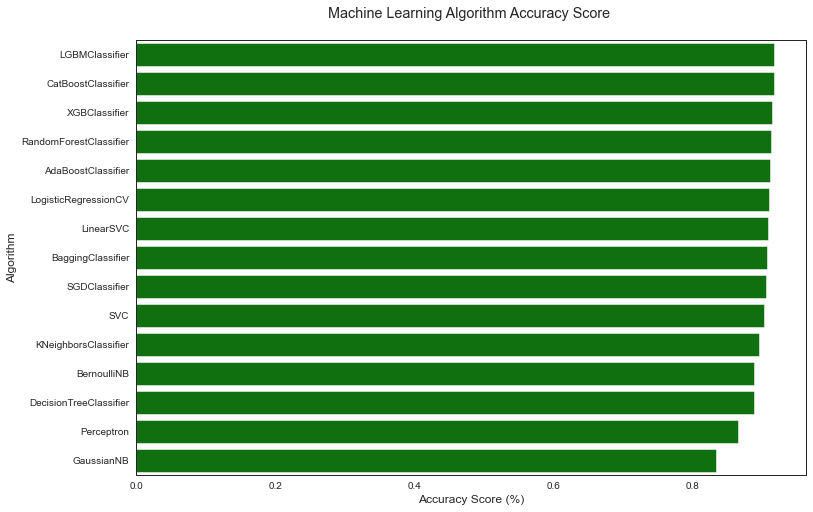

In [74]:
visualize_algs_benchmark_results(algs_benchmark_results)

In [75]:
TEST_SIZE = 0.30
data_cleaned_train_x, data_cleaned_test_x, data_cleaned_train_y, data_cleaned_test_y = model_selection.train_test_split(data_cleaned_x, data_cleaned_y, test_size=TEST_SIZE, random_state = 4262)
model = LGBMClassifier()
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_model = RandomizedSearchCV(model, param_distributions=prams, verbose=10, n_iter=20, cv=5, scoring='accuracy')
random_model.fit(data_cleaned_train_x, data_cleaned_train_y)
print(random_model.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[CV 1/5; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3;, score=0.913 total time=   6.0s
[CV 2/5; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[CV 2/5; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3;, score=0.913 total time=   6.0s
[CV 3/5; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[CV 3/5; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3;, score=0.905 total time=   6.2s
[CV 4/5; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2000, subsample=0.3
[CV 4/5; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=200

In [76]:
model = LGBMClassifier(n_estimators=200, max_depth=10, learning_rate=0.03, \
                    colsample_bytree=0.5, subsample=1)
model.fit(data_cleaned_train_x, data_cleaned_train_y)
data_cleaned_test_y_predict = model.predict(data_cleaned_test_x)
print(accuracy_score(data_cleaned_test_y, data_cleaned_test_y_predict), roc_auc_score(data_cleaned_test_y, data_cleaned_test_y_predict))

0.9166375698324022 0.7345991618514455


<a id="step5"></a>
# 5. Step 5 - Conclusion